In [44]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import  matplotlib.pyplot as plt
import seaborn as sns 

test_dfcopia = pd.read_csv('./test.csv', sep = ',')
train_dfcopia = pd.read_csv('./train.csv', sep = ',')

In [45]:
y = train_dfcopia.target
y = np.log1p(y)
train_id = train_dfcopia.ID
test_id = test_dfcopia.ID
train_df = train_dfcopia.drop(['ID', 'target'], axis = 1)
test_df = test_dfcopia.drop(['ID'], axis = 1)

In [46]:
print(np.sum(y == 0))
print(np.sum(train_df.values.flatten() == 0)/np.size(train_df))
print(np.sum(test_df.values.flatten() == 0)/np.size(test_df))

0
0.9685413111171313
0.9859478933508308


In [47]:
print(np.shape(train_df))
print(np.shape(test_df))

(4459, 4991)
(49342, 4991)


In [48]:
##treure columnes amb valor constant
treure =[]
for i in tqdm(range(len(train_df.columns))):
    if len(np.unique(train_df.values[:,i])) == 1:
        treure = treure + [i]
len(treure)

256

In [50]:
cols_train_ctt = train_df.columns[treure]
cols_test_ctt = test_df.columns[treure]
train_df.drop(cols_train_ctt, axis = 1, inplace = True)
test_df.drop(cols_test_ctt, axis = 1, inplace = True)
del train_dfcopia
del test_dfcopia
train_dfcopia = train_df.copy()
test_dfcopia = test_df .copy()

In [51]:
np.shape(train_df.values)

(4459, 4735)

In [17]:
##treure columnes repetides (no n'hi han?) (4735)
treure =[]
for i in tqdm(range(len(train_df.columns))):
    for j in range(i+1, len(train_df.columns)):
        if np.array_equal(train_df.columns[i], train_df.columns[j]):
            treure = treure + [i]
len(treure)

0

In [18]:
cols_train_ctt = train_df.columns[treure]
cols_test_ctt = test_df.columns[treure]
train_df.drop(cols_train_ctt, axis = 1, inplace = True)
test_df.drop(cols_test_ctt, axis = 1, inplace = True)

C:\Users\melcior.pijoan\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


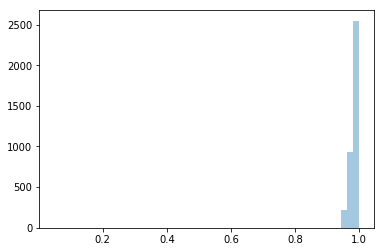

In [64]:
##codi per preprocessat

percent_zeros = np.zeros(len(train_df.columns))
for i in tqdm(range(len(train_df.columns))):
    percent_zeros[i] = np.sum(train_df.values[:,i] == 0)/len(train_df.values[:,i])
sns.distplot(percent_zeros,bins = 50, kde = False)

C:\Users\melcior.pijoan\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


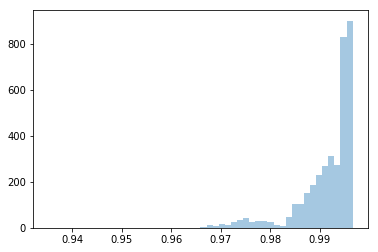

In [65]:
percent_zeros_test = np.zeros(len(test_df.columns))
for i in tqdm(range(len(test_df.columns))):
    percent_zeros_test[i] = np.sum(test_df.values[:,i] == 0)/len(test_df.values[:,i])
sns.distplot(percent_zeros_test,bins = 50, kde = False)

3695


C:\Users\melcior.pijoan\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\melcior.pijoan\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


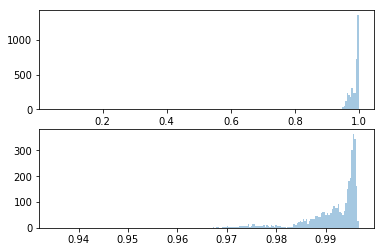

In [66]:
b = np.array(percent_zeros)
percent_zeros.sort()
b.sort()
plt.figure(1)
plt.subplot(211)
#b = b[b>0.998]
print(b.size)
sns.distplot(b,bins = 200, kde = False)


plt.subplot(212)
c = np.array(percent_zeros_test)
c.sort()
#c = c[c>0.99]
sns.distplot(c,bins = 200, kde = False)

array([      0.        ,       0.        ,       0.        , ...,
             0.        ,       0.        , 6185422.74052478])

364


C:\Users\melcior.pijoan\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


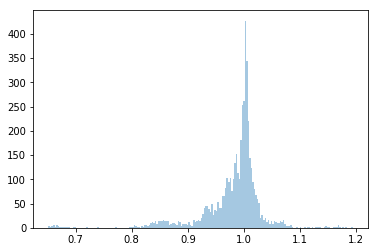

In [179]:
ratio_zeros = percent_zeros/percent_zeros_test
eliminar = ratio_zeros[ratio_zeros < 0.9]
eliminar = np.append(eliminar, ratio_zeros[ratio_zeros > 1.1])
print(len(eliminar))
sns.distplot(ratio_zeros,bins = 200, kde = False)

In [30]:
from sklearn import model_selection
from sklearn import ensemble
NUM_OF_FEATURES = 1000
def rmsle(y_aux, pred):
    return np.sqrt(np.mean(np.power(y_aux - pred, 2)))

x1, x2, y1, y2 = model_selection.train_test_split(
    train_df, y.values, test_size=0.20, random_state=5)
model = ensemble.RandomForestRegressor(n_jobs=-1, random_state=7)
model.fit(x1, y1)
print(rmsle(y2, model.predict(x2)))

col = pd.DataFrame({'importance': model.feature_importances_, 'feature': train_df.columns}).sort_values(
    by=['importance'], ascending=[False])[:NUM_OF_FEATURES]['feature'].values
train = train_df[col]
test = test_df[col]
train.shape

1.425812793634984


(4459, 1000)

In [60]:
#kolmogorov smirnov  and(0,768), or(1230,3165) (sobre 4735 columnes) or(704,649), and(7,53) sobre 1000
from scipy.stats import ks_2samp

del train
del test
train = train_df
test = test_df

THRESHOLD_P_VALUE = 0.001 #need tuned
THRESHOLD_STATISTIC = 0.1 #need tuned
diff_cols = []
diff_cols2 = []
for col in tqdm(train.columns):
    statistic, pvalue = ks_2samp(train[col].values, test[col].values)
    if pvalue <= THRESHOLD_P_VALUE: #and np.abs(statistic) > THRESHOLD_STATISTIC:
        diff_cols.append(col)
    '''
    train_aux = train[col].values[train[col] != 0]
    test_aux = test[col].values[test[col] != 0]
    statistic2, pvalue2 = ks_2samp(train_aux, test_aux)
    if pvalue2 <= THRESHOLD_P_VALUE and np.abs(statistic2) > THRESHOLD_STATISTIC:
        diff_cols2.append(col)
    '''
print(len(diff_cols))
#print(len(diff_cols2))



1041


In [62]:
train_df.drop(diff_cols, axis = 1, inplace = True)
test_df.drop(diff_cols, axis = 1, inplace = True)

In [63]:
#from sklearn import random_projection
ntrain = len(train)
ntest = len(test)
#tmp = pd.concat([train,test])#RandomProjection
weight = ((train != 0).sum()/len(train)).values
tmp_train = train[train!=0]
tmp_test = test[test!=0]
train["weight_count"] = (tmp_train*weight).sum(axis=1)
test["weight_count"] = (tmp_test*weight).sum(axis=1)
train["count_not0"] = (train != 0).sum(axis=1)
test["count_not0"] = (test != 0).sum(axis=1)
train["sum"] = train.sum(axis=1)
test["sum"] = test.sum(axis=1)
train["var"] = tmp_train.var(axis=1)
test["var"] = tmp_test.var(axis=1)
train["median"] = tmp_train.median(axis=1)
test["median"] = tmp_test.median(axis=1)
train["mean"] = tmp_train.mean(axis=1)
test["mean"] = tmp_test.mean(axis=1)
train["std"] = tmp_train.std(axis=1)
test["std"] = tmp_test.std(axis=1)
train["max"] = tmp_train.max(axis=1)
test["max"] = tmp_test.max(axis=1)
train["min"] = tmp_train.min(axis=1)
test["min"] = tmp_test.min(axis=1)
train["skew"] = tmp_train.skew(axis=1)
test["skew"] = tmp_test.skew(axis=1)
train["kurtosis"] = tmp_train.kurtosis(axis=1)
test["kurtosis"] = tmp_test.kurtosis(axis=1)
del(tmp_train)
del(tmp_test)
'''
NUM_OF_COM = 100 #need tuned
transformer = random_projection.SparseRandomProjection(n_components = NUM_OF_COM)
RP = transformer.fit_transform(tmp)
rp = pd.DataFrame(RP)
columns = ["RandomProjection{}".format(i) for i in range(NUM_OF_COM)]
rp.columns = columns

rp_train = rp[:ntrain]
rp_test = rp[ntrain:]
rp_test.index = test.index

#concat RandomProjection and raw data
train = pd.concat([train,rp_train],axis=1)
test = pd.concat([test,rp_test],axis=1)

del(rp_train)
del(rp_test)
'''
train.shape

KeyboardInterrupt: 

In [53]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
#define evaluation method for a given model. we use k-fold cross validation on the training set. 
#the loss function is root mean square logarithm error between target and prediction
#note: train and y_train are feeded as global variables
NUM_FOLDS = 5 #need tuned
def rmsle_cv(model):
    kf = KFold(NUM_FOLDS, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, np.log1p(train), y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)
#ensemble method: model averaging
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    # the reason of clone is avoiding affect the original base models
    def fit(self, X, y_aux):
        self.models_ = [clone(x) for x in self.models]  
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y_aux)
        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([ model.predict(X) for model in self.models_ ])
        return np.mean(predictions, axis=1)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.055, colsample_bylevel =0.5, 
                             gamma=1.5, learning_rate=0.02, max_depth=32, 
                             objective='reg:linear',booster='gbtree',
                             min_child_weight=57, n_estimators=1000, reg_alpha=0, 
                             reg_lambda = 0,eval_metric = 'rmse', subsample=0.7, 
                             silent=1, n_jobs = -1, early_stopping_rounds = 14,
                             random_state =7, nthread = -1)
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=144,
                              learning_rate=0.005, n_estimators=720, max_depth=13,
                              metric='rmse',is_training_metric=True,
                              max_bin = 55, bagging_fraction = 0.8,verbose=-1,
                              bagging_freq = 5, feature_fraction = 0.9) 


score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

averaged_models = AveragingModels(models = (model_xgb, model_lgb))
score = rmsle_cv(averaged_models)
print("averaged score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


C:\Users\melcior.pijoan\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log1p
  if sys.path[0] == '':


KeyboardInterrupt: 

In [77]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=144,
                              learning_rate=0.005, n_estimators=720, max_depth=13,
                              metric='rmse',is_training_metric=True,
                              max_bin = 55, bagging_fraction = 0.8,verbose=-1,
                              bagging_freq = 5, feature_fraction = 0.9) 

model_xgb = xgb.XGBRegressor(colsample_bytree=0.055, colsample_bylevel =0.5, 
                             gamma=1.5, learning_rate=0.02, max_depth=32, 
                             objective='reg:linear',booster='gbtree',
                             min_child_weight=57, n_estimators=1000, reg_alpha=0, 
                             reg_lambda = 0,eval_metric = 'rmse', subsample=0.7, 
                             silent=1, n_jobs = -1, early_stopping_rounds = 14,
                             random_state =7, nthread = -1)
model_lgb.fit(train_df,y)
model_xgb.fit(train_df,y)
lgb_pred = model_lgb.predict(test_df)
xgb_pred = model_lgb.predict(test_df)

def rmsle_cv(model):
    kf = KFold(NUM_FOLDS, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse= np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)



KeyError: 'kurtosis'